In [2]:
pip install facenet_pytorch

     |████████████████████████████████| 1.9 MB 5.3 MB/s 


In [45]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
from facenet_pytorch import MTCNN as face_mtcnn
from PIL import Image
import torch
from imutils.video import FileVideoStream
import cv2
import time
import glob
from tqdm.notebook import tqdm
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import matplotlib.pyplot as plt
import os
from zipfile import ZipFile
from mtcnn.mtcnn import MTCNN as mtcnn
import dlib

In [16]:
path_to_zip_file = '/content/drive/MyDrive/Thesis/face detection.zip'### give path here
with ZipFile(path_to_zip_file, 'r') as zf:
  zf.extractall()

In [49]:
fast_mtcnn = face_mtcnn(margin=14,factor=0.6,keep_all=True,device=device)
mtcnn_detector =  mtcnn()
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
hogFaceDetector = dlib.get_frontal_face_detector()

In [50]:
def loop_files(dir):
    file_list = []
    for filename in os.listdir(dir):
        path = dir + filename
        file_list.append(path)
    print('There are %d image files in this directory' % len(file_list))
    return file_list

In [58]:
def run_facenet_mtcnn(file_path):
  file_list = loop_files(file_path)
  begin = time.time()
  for files in file_list:
    img = plt.imread(files)
    faces = fast_mtcnn.detect(img)
  end = time.time()
  total_time = end-begin
  print('Time taken for {} images files using MTCNN on GPU is {}'.format(len(file_list),float(total_time)))
  print('The average time taken per image is ',float(total_time)/len(file_list))

run_facenet_mtcnn('/content/face detection/')

There are 11 image files in this directory
Time taken for 11 images files using MTCNN on GPU is 1.044069766998291
The average time taken per image is  0.094915433363481


In [55]:
def run_mtcnn(file_path):
  file_list = loop_files(file_path)
  begin = time.time()
  for files in file_list:
    img = plt.imread(files)
    faces = mtcnn_detector.detect_faces(img)
  end = time.time()
  total_time = end-begin
  print('Time taken for {} images files using MTCNN is {}'.format(len(file_list),float(total_time)))
  print('The average time taken per image is ',float(total_time)/len(file_list))

run_mtcnn('/content/face detection/')

There are 11 image files in this directory
Time taken for 11 images files using MTCNN is 8.596216201782227
The average time taken per image is  0.7814742001620206


In [56]:
def run_haar_cascade(file_path):
  file_list = loop_files(file_path)
  begin = time.time()
  for files in file_list:
    img = cv2.imread(files)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bounding_box = face_cascade.detectMultiScale(gray_img,1.1,9)
  end = time.time()
  total_time = end-begin
  print('Time taken for {} images files using Haar Cascade is {}'.format(len(file_list),float(total_time)))
  print('The average time taken per image is ',float(total_time)/len(file_list))

run_haar_cascade('/content/face detection/')

There are 11 image files in this directory
Time taken for 11 images files using Haar Cascade is 3.2789149284362793
The average time taken per image is  0.29808317531238904


In [57]:
def run_hogg(file_path):
  file_list = loop_files(file_path)
  begin = time.time()
  for files in file_list:
    img = cv2.imread(files)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = hogFaceDetector(gray_img, 1)
  end = time.time()
  total_time = end-begin
  print('Time taken for {} images files using DLIB HOGG is {}'.format(len(file_list),float(total_time)))
  print('The average time taken per image is ',float(total_time)/len(file_list))

run_hogg('/content/face detection/')

There are 11 image files in this directory
Time taken for 11 images files using DLIB HOGG is 3.1076512336730957
The average time taken per image is  0.28251374851573596


There are 11 image files in this directory


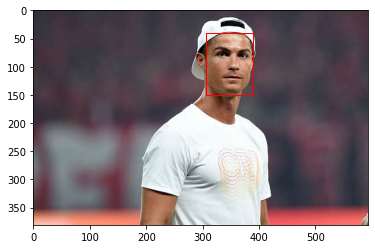

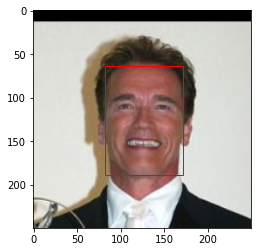

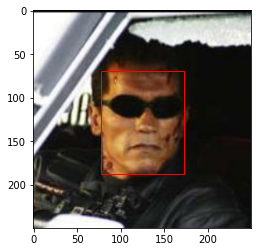

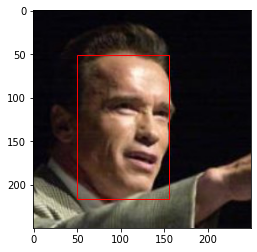

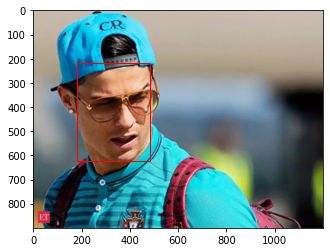

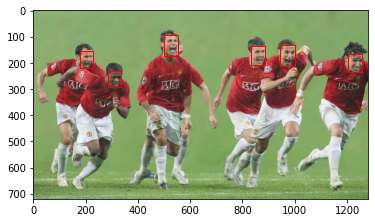

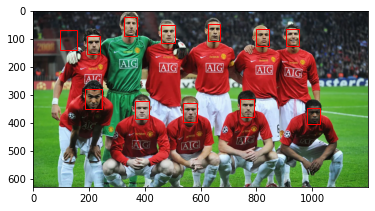

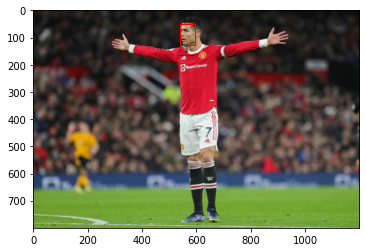

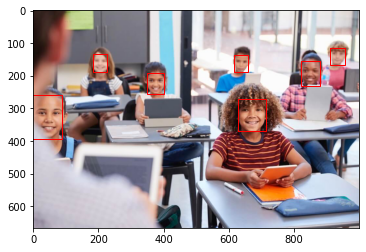

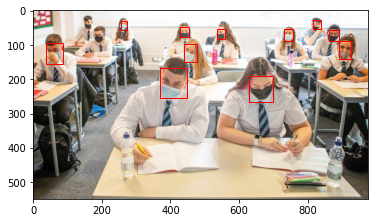

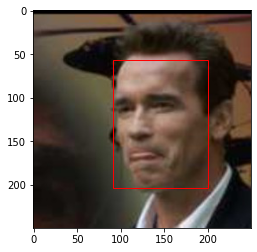

In [61]:
def show_facenet_mtcnn(file_path):
  file_list = loop_files(file_path)
  for files in file_list:
    img = plt.imread(files)
    faces = fast_mtcnn.detect(img)
    ax = plt.gca()
    for result in faces[0]:
      x, y, width, height = result
      rect = plt.Rectangle((x, y), width-x, height-y, fill=False, color='red')
      ax.add_patch(rect)
    plt.imshow(img)
    plt.show()

show_facenet_mtcnn('/content/face detection/')

There are 11 image files in this directory


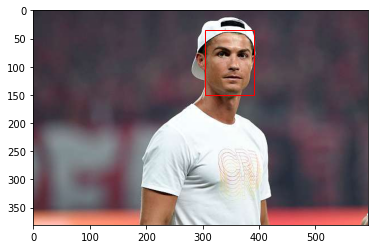

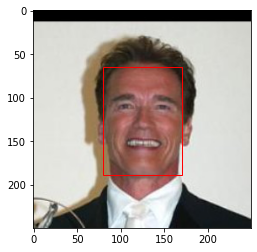

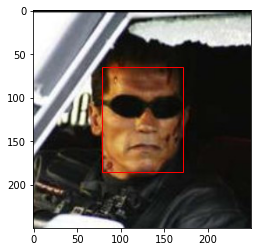

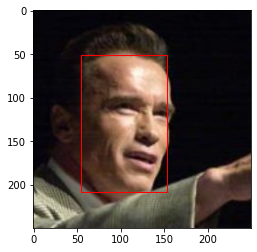

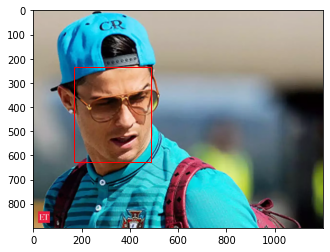

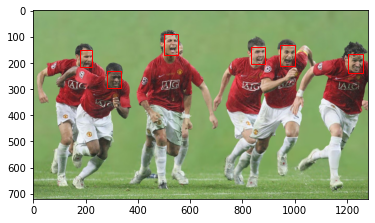

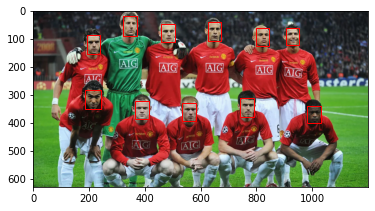

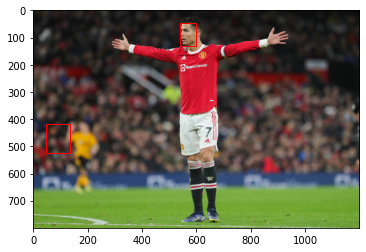

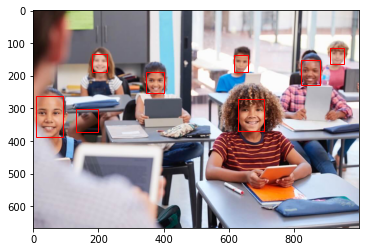

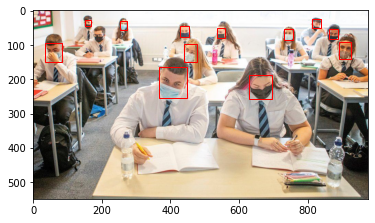

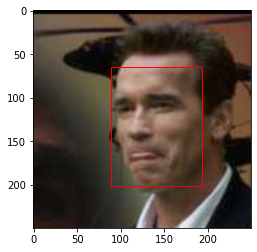

In [62]:
def show_mtcnn(file_path):
  file_list = loop_files(file_path)
  for files in file_list:
    img = plt.imread(files)
    detector = mtcnn()
    faces = detector.detect_faces(img)
    ax = plt.gca()
    for result in faces:
      x, y, width, height = result['box']
      rect = plt.Rectangle((x, y), width, height, fill=False, color='red')
      ax.add_patch(rect)
    plt.imshow(img)
    plt.show()

show_mtcnn('/content/face detection/')

There are 11 image files in this directory


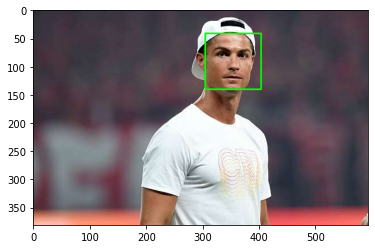

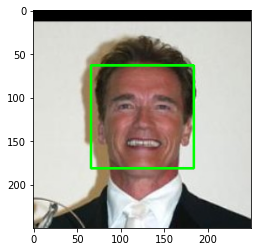

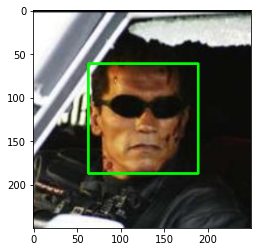

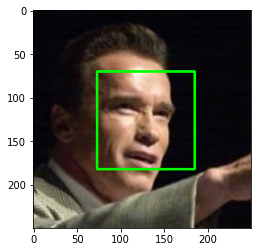

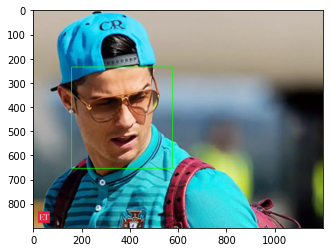

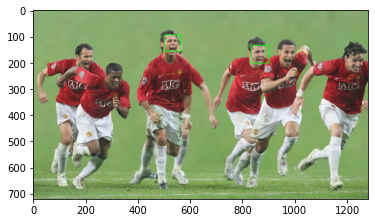

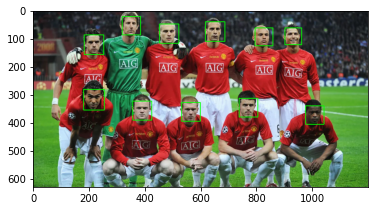

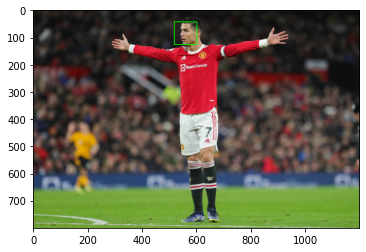

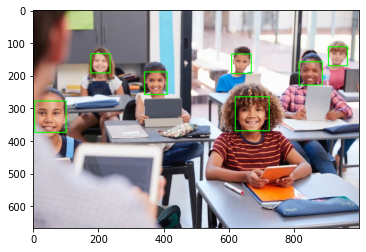

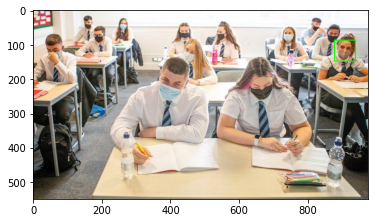

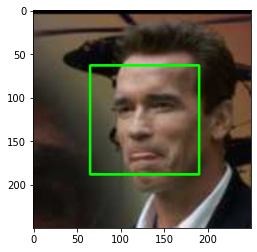

In [63]:
def show_haar_cascade(file_path):
  file_list = loop_files(file_path)
  for files in file_list:
    img = cv2.imread(files)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces_rect = face_cascade.detectMultiScale(gray_img, 1.1, 9)
    for (x, y, w, h) in faces_rect:
      cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

show_haar_cascade('/content/face detection/')

There are 11 image files in this directory


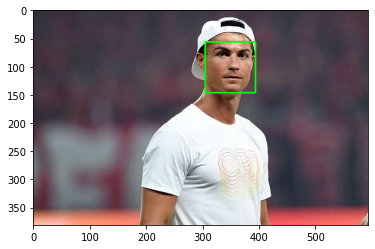

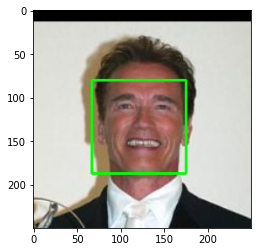

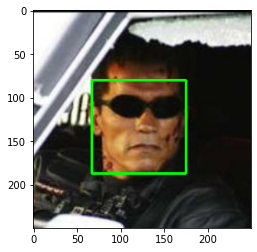

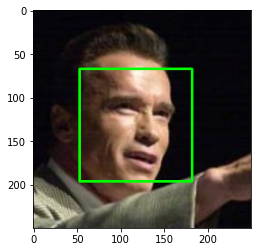

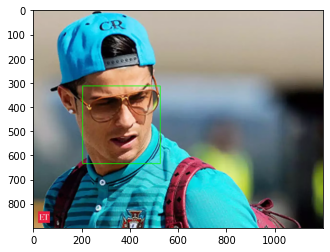

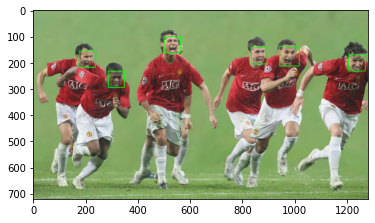

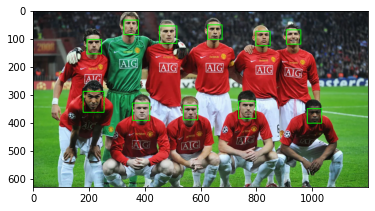

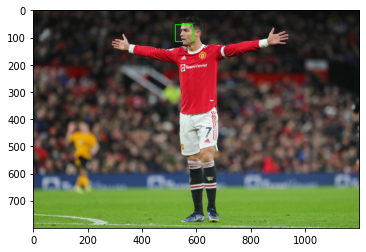

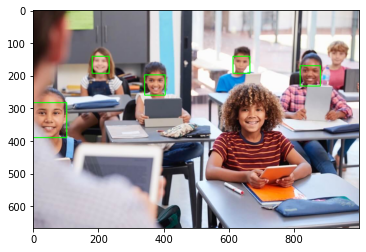

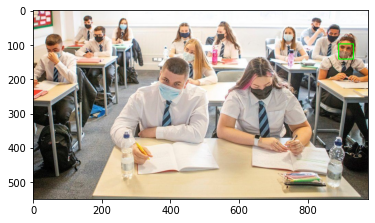

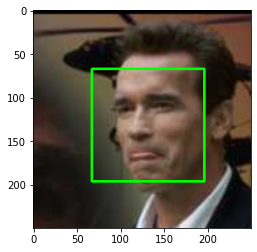

In [64]:
def show_hogg(file_path):
  file_list = loop_files(file_path)
  for files in file_list:
    img = cv2.imread(files)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hogFaceDetector = dlib.get_frontal_face_detector()
    faces = hogFaceDetector(gray_img, 1)
    for (i, rect) in enumerate(faces):
      x = rect.left()
      y = rect.top()
      w = rect.right() - x
      h = rect.bottom() - y
      cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

show_hogg('/content/face detection/')